# Grade: /100 points

# Assignment 01: Supervised learning, Linear models, and Loss functions

In this assignment, you're going to write your own methods to fit a linear model using either an OLS or LAD cost function.  

## Data set 

We will examine some data representing the miles-per-gallon of 398 cars given other variables describing them:

1. mpg: continuous. The miles-per-gallon of the car.
2. cylinders: multi-valued discrete. Number of cylinders.
3. displacement: continuous. Engine displacement of the car. 
4. horsepower: continuous. Total horsepower of the car.
5. weight: continuous. Weight in lbs.
6. acceleration: continuous. Acceleration 0-60mph in seconds.
9. car name: string (unique for each instance)

## Follow These Steps Before Submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


## Preliminaries

In [1]:
# Import all the necessary packages: 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
from sklearn import linear_model

%matplotlib inline

In [2]:
# Uncomment if using Google Colab or Kaggle Kernels.
# Imports the data using gdown.
# !gdown https://drive.google.com/uc?id=1PtY3ne37XA8Jk_cAf0Cd7JSRvEU8KDbp


## Part 1
### Question 1.1:  /10 points


Read the `car_data.csv` file as a `pandas.DataFrame` and show its descriptive statistics.  Investigate the relationship between the cars' weight and their mpg by plotting a scatter plot of the `weight` (x axis) and `mpg` columns (y axis). Add an `alpha`(transparency of the plotted dots) in case some data are overlapping. Remember to label your axes.

,MPG,cylinders,displacement,horsepower,weight,acceleration,name
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392
unique,NaN,NaN,NaN,NaN,NaN,NaN,301
top,NaN,NaN,NaN,NaN,NaN,NaN,amc matador
freq,NaN,NaN,NaN,NaN,NaN,NaN,5
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,NaN
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,NaN
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,NaN
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,NaN
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,NaN


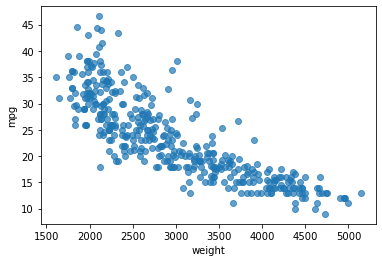

In [3]:
# YOUR CODE HERE
df = pd.read_csv("car_data.csv")
display(df.describe(include = 'all'))
plt.scatter(x = df.weight, y = df.MPG, alpha = 0.7)
plt.xlabel("weight")
plt.ylabel("mpg")
plt.show()

**Written answer: What do you see here? Discuss your findings** 
Seems to be a few potential outliers on the upper end of mpg. This could have an affect on the OLS fit as it is more sensitive to outliers. Also, the data seems to have a moderate linear trend.

### Question 1.2: /5 point

Recall that the linear model, we obtain predictions by computing 

$$ \hat{\mathbf{y}} = \mathbf{X} \hat{\beta} $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\hat{\beta}$ are coefficients, and $\hat{\mathbf{y}}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```

Call your function using these values. 

Report $\hat{\mathbf{y}}$. 

What is the dimensionality of the numpy-array that you get back? 

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [4]:
# Your code here.
def linearModelPredict(b,X):
    # get model prediction
    yp = np.dot(X,b)
    return yp

X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
display(linearModelPredict(b,X))

print("The dimensionality is 1-d. It is a 1 by 3 matrix. 3 predicted y values corresponding to the 3 x values in the X matrix.")

array([ 0.1, -0.2,  0.7])

The dimensionality is 1-d. It is a 1 by 3 matrix. 3 predicted y values corresponding to the 3 x values in the X matrix.


### Question 1.3: /15 points

Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report the loss and the gradient. 


In [5]:
# Your code here.
def linearModelLossRSS(b,X,y):
    # get model prediction
    yp = linearModelPredict(b,X)
    # get residual vector
    res = y - yp
    # get the residual sum of squares
    rss = np.dot(res,res)
    # get the gradient
    gradient= -2*np.dot(res,X)
    return (rss, gradient)
    
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])

linearModelLossRSS(b,X,y)

(2.06, array([-3.6, -4. ]))

**Written answer**: To minimize the loss, do you need increase or decrease the value of the parameters? 

**Your answer here.** Decrease the value of the parameters.

### Question 1.4:  /15 points. 

Now that you've implemented a loss function in question 1.3, it is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the R2. 

Test the function with the values: 
```
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2]) 
```

Report best parameters and the fitted R2 


In [7]:
# Your code here
def linearModelFit(X,y,lossfcn):
    # setting starting values
    nrows,ncols = X.shape
    #display(ncols)
    bstart = np.zeros((ncols, 1))
    #display(bstart)
    # call the optimization function
    Result = so.minimize(lossfcn, bstart, args = (X,y), jac = True)
    #display(Result)
    bpred = Result.x
    # computing R-squared using RSS and TSS
    RSS, gradient = linearModelLossRSS(bpred,X,y)
    TSS = np.dot(y-np.mean(y), y-np.mean(y))
    R2 = 1-RSS/TSS
    return bpred, R2
    
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2]) 

display(linearModelFit(X,y,linearModelLossRSS))
    

      fun: 0.56
 hess_inv: array([[ 0.17857143, -0.03571429],
       [-0.03571429,  0.10714286]])
      jac: array([-4.44089210e-16, -6.66133815e-16])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([0.6, 0.6])

(array([0.6, 0.6]), 0.75)

### Question 1.5: /15 points

Use the above functions to fit your model to the car data. Use the MPG as the target (y) variable and the weight as the independent (x). Then use your model and the fitted parameters to make predictions along a grid of equally spaced weights within the original range of the weight variable.  

Plot the data and add a line for the predicted values. You can get these by generating a new X-matrix with 100 equally space weights (using for example [```np.linspace```](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Also report the $R^2$ value for the fit. You can do this by either printing out the $R^2$ of the fit or putting it on your plot via the `annotate` function in matplotlib.


In [ ]:
# Your code here
y = df.loc[:,"MPG"].values
x = df.loc[:, "weight"].values
X = np.transpose(np.concatenate([[np.ones(len(df))], [df["weight"].to_numpy()]]))

bpr, R2 = linearModelFit(X,y,lossfcn = linearModelLossRSS) # get beta params

x_grid = np.linspace(x.min(), x.max(), 100) # get grid
Xnew = np.c_[np.ones(x_grid.size), x_grid] # make design

ypred = linearModelPredict(bpr, Xnew) # get prediction

plt.scatter(x,y, alpha = 0.7)
plt.plot(x_grid, ypred, color = 'red')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

print("L2 R-squared Value: ", R2)



## Part 2: LAD Regression

### Question 2.1:  /15 points

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report the loss and the gradient. 

In [ ]:
# Your code here
def linearModelLossLAD(beta,X,y):
    # get model prediction
    yp = linearModelPredict(beta,X)
    # get residual vector
    res = y - yp
    # get the sum of absolute deviations
    sad = sum(abs(res))
    # get the gradient
    grad = - (np.dot(np.sign(res),X))
    return (sad,grad)
    
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])

linearModelLossLAD(b,X,y)

### Question 2.2: /10 points


Use the above functions to fit your LAD model. Use your model to make predictions along a grid of 100 equally spaced car weights.  Once fit, add the fitted line to the scatter plot as in question 1.5.  Also report the $R^2$-value. 

**Written answer**: What is the difference in the fit obtained with an L1 as compared to the L2 cost function? How their $R^2$ values compare? Why?  

Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimizers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



In [ ]:
# Your code here
y = df.loc[:,"MPG"].values
x = df.loc[:, "weight"].values
X = np.transpose(np.concatenate([[np.ones(len(df))], [df["weight"].to_numpy()]]))

# Repeating Code from OLS plot
bpr, R2 = linearModelFit(X,y,lossfcn = linearModelLossLAD) # get beta params

x_grid = np.linspace(x.min(), x.max(), 100) # get grid
Xnew = np.c_[np.ones(x_grid.size), x_grid] # make design

yPredict = linearModelPredict(bpr, Xnew) # get prediction

plt.scatter(x,y, alpha = 0.7)
plt.plot(x_grid, yPredict, color = 'blue') # LAD fit
plt.plot(x_grid, ypred, color = 'red') #OLS fit
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

print("L1 R-squared Value: ", R2)

The L1 fit is lower than the L2 fit on the left side of the graph. This is because the L1 fit is more robust to outliers. The R-squared value for L2 will always be larger than for L1. This is because OLS is miming Residual Least Squares. 

### Question 2.3: /15 points

Now we will use all data for the fit. Fit an OLS model to the car data (excluding the name) with the `linear_model` module from the `sklearn` package by using the [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class.  In no more than two sentences, comment on the $R^2$ values from `sklearn` and the $R^2$ values from your models. Are they similar?

In [ ]:
# Your code here

model = linear_model.LinearRegression()

y = df['MPG']

# drop predicting attribute and name column from data
x = df.drop(['name','MPG'], axis = 1)

# fit the data
model.fit(x,y)

# get r-squared value
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

The R-squared value obtained from sklearn is slightly higher that the R-squared value from my OLS model due to the addition of predictor variables. This however does not tell us anything about weight as a predictor as adding predictor variables always results in a higher R-squared and could lead to overfitting.